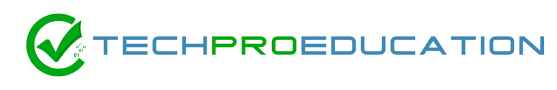

<div class="alert alert-block alert-info alert">

# <span style=" color:red">WELCOME!
    
Welcome to "Bike Demand Visualization Project" which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.</span>


<div class="alert alert-block alert-success ">

## <span style=" color:red">Determines 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog
    
Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc. Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.
    
# <span style=" color:red">Tasks
</span>





<div class="alert alert-warning alert-info">
<span style=" color:red">1. Import Libraries
</span>

In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

<div class="alert alert-warning alert-info">
<span style=" color:red">2. Read Dataset
</span>

In [2]:
df = pd.read_csv("store_sharing.csv")
df.head()

timestamp  cnt   t1   t2    hum  wind_speed  weather_code  \
0  2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
1  2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2  2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
3  2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
4  2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

   is_holiday  is_weekend  season  
0         0.0         1.0     3.0  
1         0.0         1.0     3.0  
2         0.0         1.0     3.0  
3         0.0         1.0     3.0  
4         0.0         1.0     3.0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [4]:
# Let's create a more detailed table for our features

# Create an empty list to store the output data
output_data = []

for col in df.columns:
    
    # If the number of unique values in the column is less than or equal to 10
    if df.loc[:, col].nunique() <= 7:
        # Get the unique values in the column
        unique_values = df.loc[:, col].unique()
        # Append the column name, number of unique values, unique values, and data type to the output data
        output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
    else:
        # Otherwise, append only the column name, number of unique values, and data type to the output data
        output_data.append([col, df.loc[:, col].nunique(), df.loc[:, col].dtype])

output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

output_df

Column Name  Number of Unique Values  \
0     timestamp                    17414   
1           cnt                     3781   
2            t1                       73   
3            t2                       82   
4           hum                      143   
5    wind_speed                      103   
6  weather_code                        7   
7    is_holiday                        2   
8    is_weekend                        2   
9        season                        4   

                          Unique Values  Data Type  
0                                 object      None  
1                                  int64      None  
2                                float64      None  
3                                float64      None  
4                                float64      None  
5                                float64      None  
6  [3.0, 1.0, 4.0, 7.0, 2.0, 26.0, 10.0]   float64  
7                             [0.0, 1.0]   float64  
8                             [1.0, 0.0]   float64  
9                   [3.0, 0.0, 1.0, 2.0]   float64

<div class="alert alert-warning alert-info">
<span style=" color:red">3. Check missing values and if there are any dublicate rows or not.
</span>

In [5]:
# missing values
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [6]:
# dublicate rows
df.duplicated().sum()

0

<div class="alert alert-warning alert-info">
<span style=" color:red">4. Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)
</span>


In [7]:
df_discrete = ["season","is_holiday","is_weekend","weather_code"]

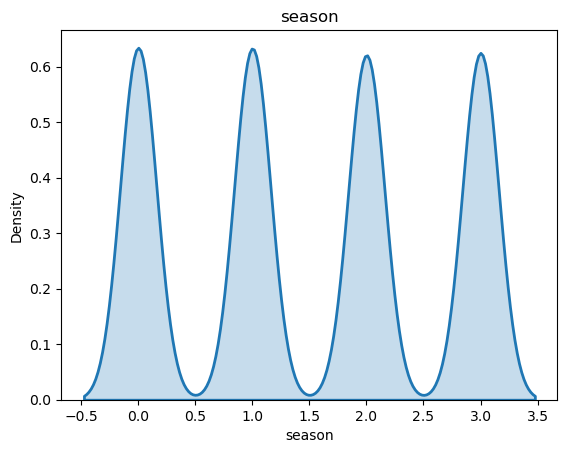

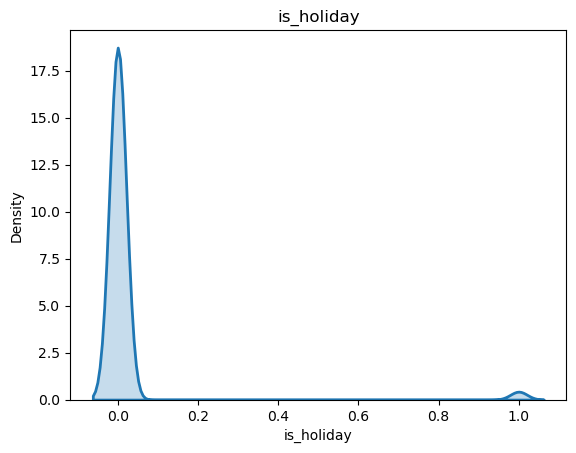

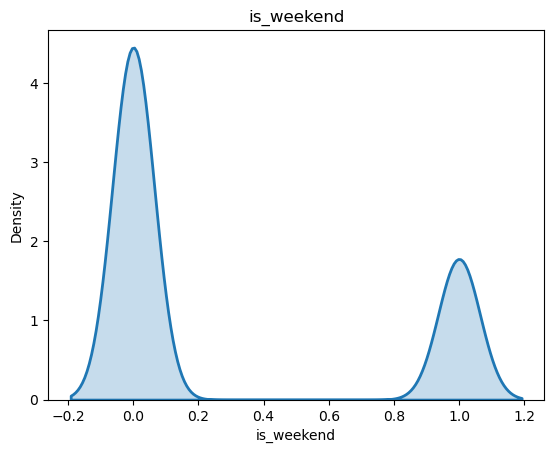

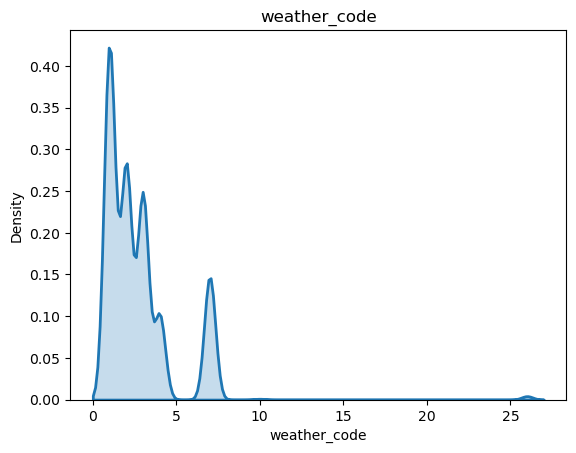

In [50]:
for i in df_discrete:
    sns.kdeplot(data = df, x = i, fill = True, linewidth = 2)
    plt.title(i)
    plt.show()

# weather_code
sns.countplot(x='weather_code',data=df)

1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
2 = scattered clouds / few clouds
3 = Broken clouds
4 = Cloudy
7 = Rain/ light Rain shower/ Light rain
10 = rain with thunderstorm
26 = snowfall
94 = Freezing Fog

<div class="alert alert-warning alert-info">
<span style=" color:red">5. Look at the data type of each variable, transform timestamp in type, and set it as index.
</span>

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [10]:
# pd.to_datetime() fonksiyonu "timestamp" sütununu datetime tipine dönüştürmek için kullanılır. 
df['timestamp'] = pd.to_datetime(df['timestamp'])

# set_index() fonksiyonu, "timestamp" sütununu DataFrame'in indeksi olarak ayarlamak için kullanılır.
df.set_index('timestamp', inplace=True)

In [11]:
df.head(3)

cnt   t1   t2   hum  wind_speed  weather_code  \
timestamp                                                            
2015-01-04 00:00:00  182  3.0  2.0  93.0         6.0           3.0   
2015-01-04 01:00:00  138  3.0  2.5  93.0         5.0           1.0   
2015-01-04 02:00:00  134  2.5  2.5  96.5         0.0           1.0   

                     is_holiday  is_weekend  season  
timestamp                                            
2015-01-04 00:00:00         0.0         1.0     3.0  
2015-01-04 01:00:00         0.0         1.0     3.0  
2015-01-04 02:00:00         0.0         1.0     3.0

<div class="alert alert-warning alert-info">
<span style=" color:red">6. Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)
</span>

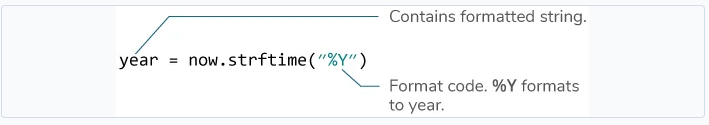

In [12]:
df['hour'] = df.index.hour               # df1['hour'] = df1.index.strftime("%H")
df['day_of_week'] = df.index.dayofweek   # df1['dayofweek'] = df1.index.strftime("%A")
df['day_of_month'] = df.index.day        # df1['day'] = df1.index.strftime("%d")
df['month'] = df.index.month             # df1['month'] = df1.index.strftime("%m")
df['quarter'] = df.index.quarter         # df1['quarter'] = df1.index.strftime("%q")
df['year'] = df.index.year               # df['year'] = df1.index.strftime("%Y")
df.head(3)    

cnt   t1   t2   hum  wind_speed  weather_code  \
timestamp                                                            
2015-01-04 00:00:00  182  3.0  2.0  93.0         6.0           3.0   
2015-01-04 01:00:00  138  3.0  2.5  93.0         5.0           1.0   
2015-01-04 02:00:00  134  2.5  2.5  96.5         0.0           1.0   

                     is_holiday  is_weekend  season  hour  day_of_week  \
timestamp                                                                
2015-01-04 00:00:00         0.0         1.0     3.0     0            6   
2015-01-04 01:00:00         0.0         1.0     3.0     1            6   
2015-01-04 02:00:00         0.0         1.0     3.0     2            6   

                     day_of_month  month  quarter  year  
timestamp                                                
2015-01-04 00:00:00             4      1        1  2015  
2015-01-04 01:00:00             4      1        1  2015  
2015-01-04 02:00:00             4      1        1  2015

<div class="alert alert-warning alert-info">
<span style=" color:red">7. Visualize the correlation with a heatmap
</span>

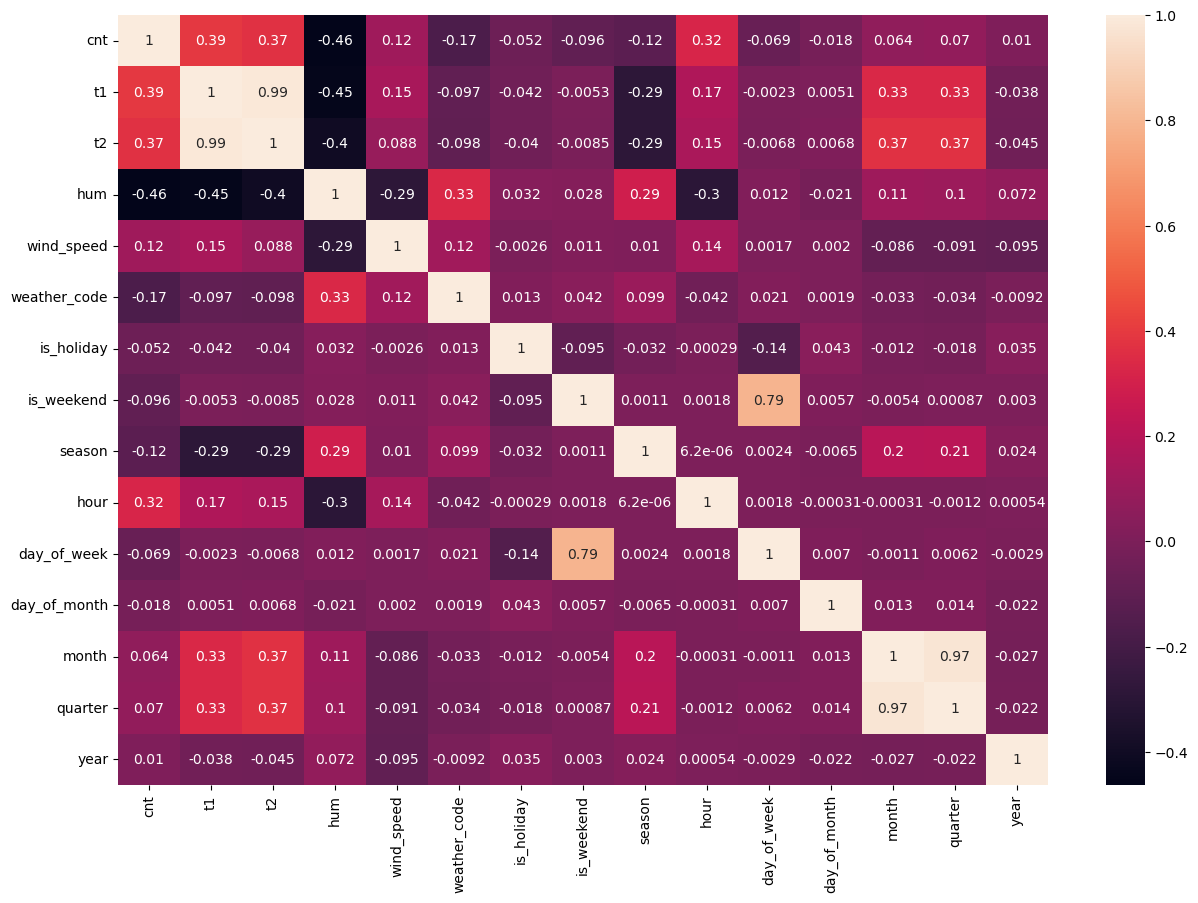

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True);

<div class="alert alert-warning alert-info">
<span style=" color:red">8. Visualize the correlation of the target variable and the other features with barplot
</span>

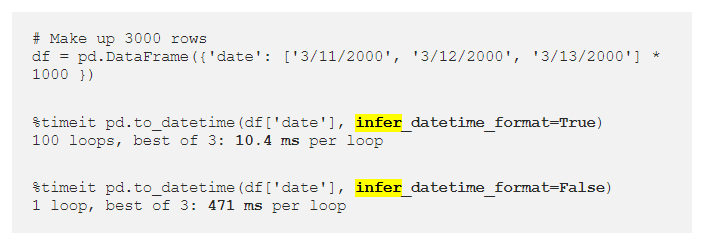

In [14]:
corr_matrix = df.corr()

In [15]:
# remove the cnt column and assign only the features that correlate with cnt to the target_corr variable
target_corr = corr_matrix['cnt'].drop('cnt')

In [16]:
target_corr

t1              0.388798
t2              0.369035
hum            -0.462901
wind_speed      0.116295
weather_code   -0.166633
is_holiday     -0.051698
is_weekend     -0.096499
season         -0.116180
hour            0.324423
day_of_week    -0.068688
day_of_month   -0.017887
month           0.063757
quarter         0.069652
year            0.010046
Name: cnt, dtype: float64

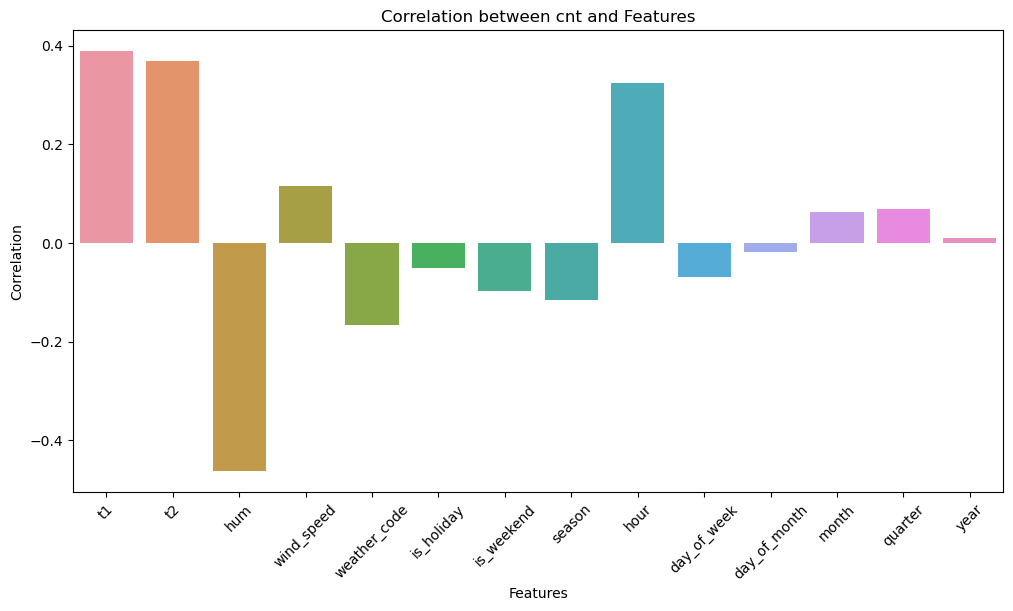

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(x=target_corr.index, y=target_corr.values)
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.title('Correlation between cnt and Features')
plt.xticks(rotation=45)
plt.show()

In [18]:
target_corr = target_corr.sort_values(ascending=False)

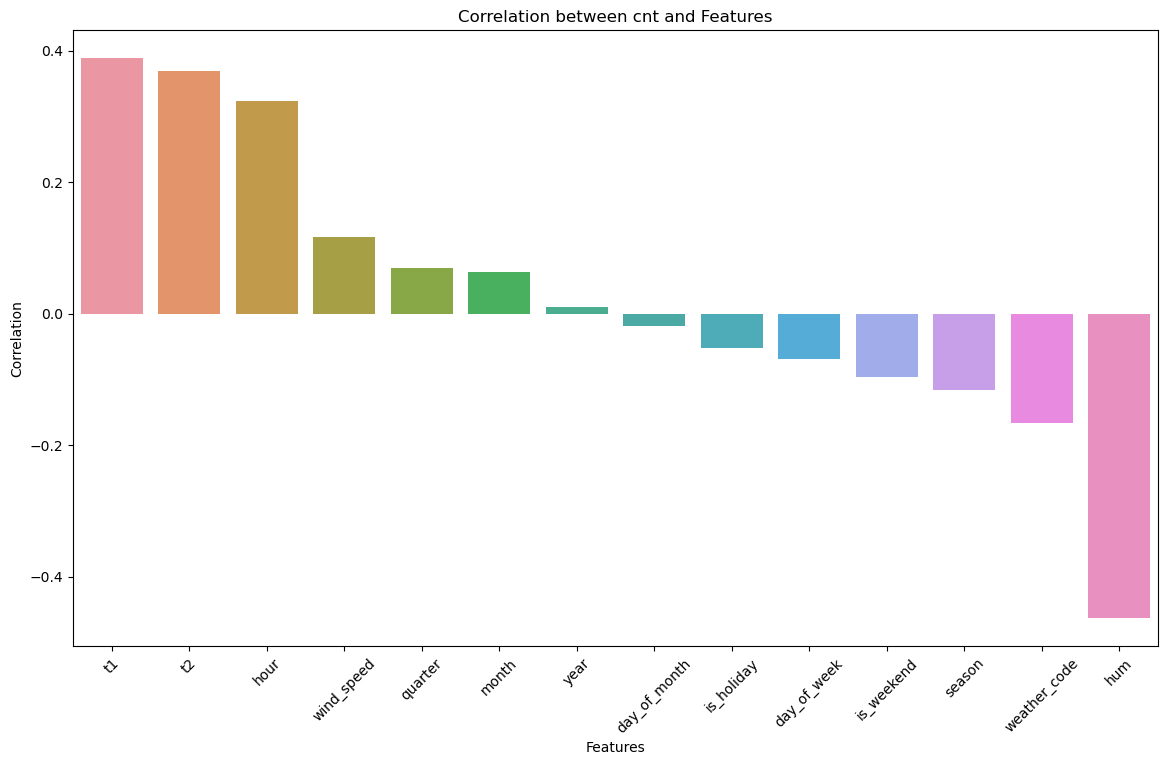

In [19]:
plt.figure(figsize=(14, 8))
sns.barplot(x=target_corr.index, y=target_corr.values)
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.title('Correlation between cnt and Features')
plt.xticks(rotation=45) # in OOM we use ax.tick_params(axis = "x", rotation = 45) instead
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">9. Plot bike shares over time use lineplot.
</span>

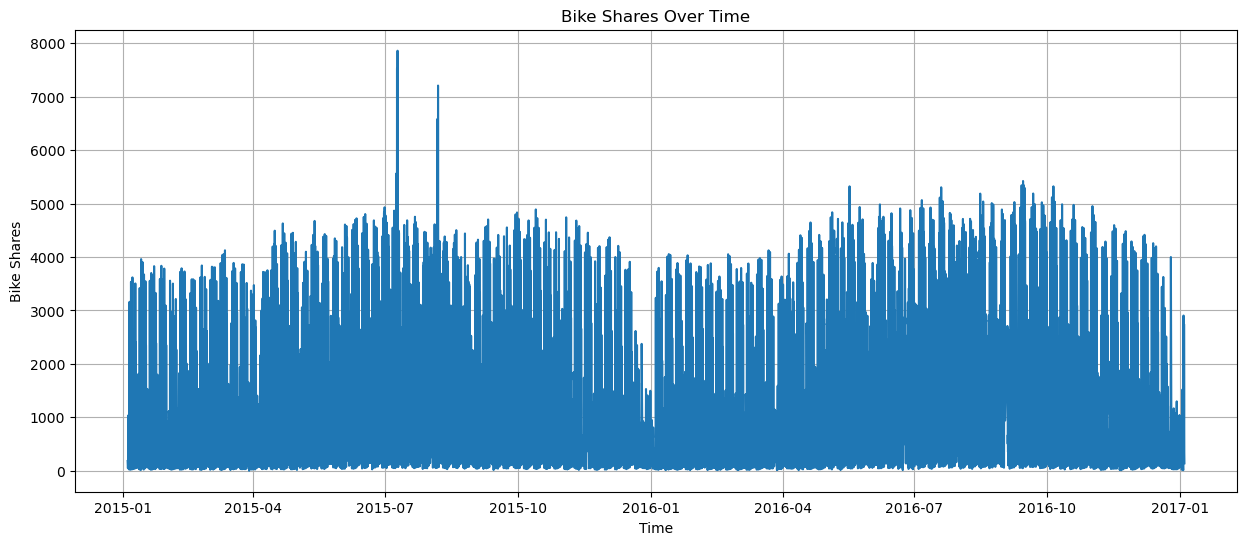

In [60]:
plt.figure(figsize=(15, 6))
sns.lineplot(x = df.index, y = df['cnt'])
plt.xlabel('Time')
plt.ylabel('Bike Shares')
plt.title('Bike Shares Over Time')
plt.grid(True)
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">10. Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).
</span>

In [70]:
df['year_of_month'] = df.index.year.astype(str) + '-' + df.index.month.astype(str)

In [71]:
df.head(3)

cnt   t1   t2   hum  wind_speed  weather_code  \
timestamp                                                            
2015-01-04 00:00:00  182  3.0  2.0  93.0         6.0           3.0   
2015-01-04 01:00:00  138  3.0  2.5  93.0         5.0           1.0   
2015-01-04 02:00:00  134  2.5  2.5  96.5         0.0           1.0   

                     is_holiday  is_weekend  season  hour  day_of_week  \
timestamp                                                                
2015-01-04 00:00:00         0.0         1.0     3.0     0            6   
2015-01-04 01:00:00         0.0         1.0     3.0     1            6   
2015-01-04 02:00:00         0.0         1.0     3.0     2            6   

                     day_of_month  month  quarter  year year_of_month  
timestamp                                                              
2015-01-04 00:00:00             4      1        1  2015        2015-1  
2015-01-04 01:00:00             4      1        1  2015        2015-1  
2015-01-04 02:00:00             4      1        1  2015        2015-1

### lineplot

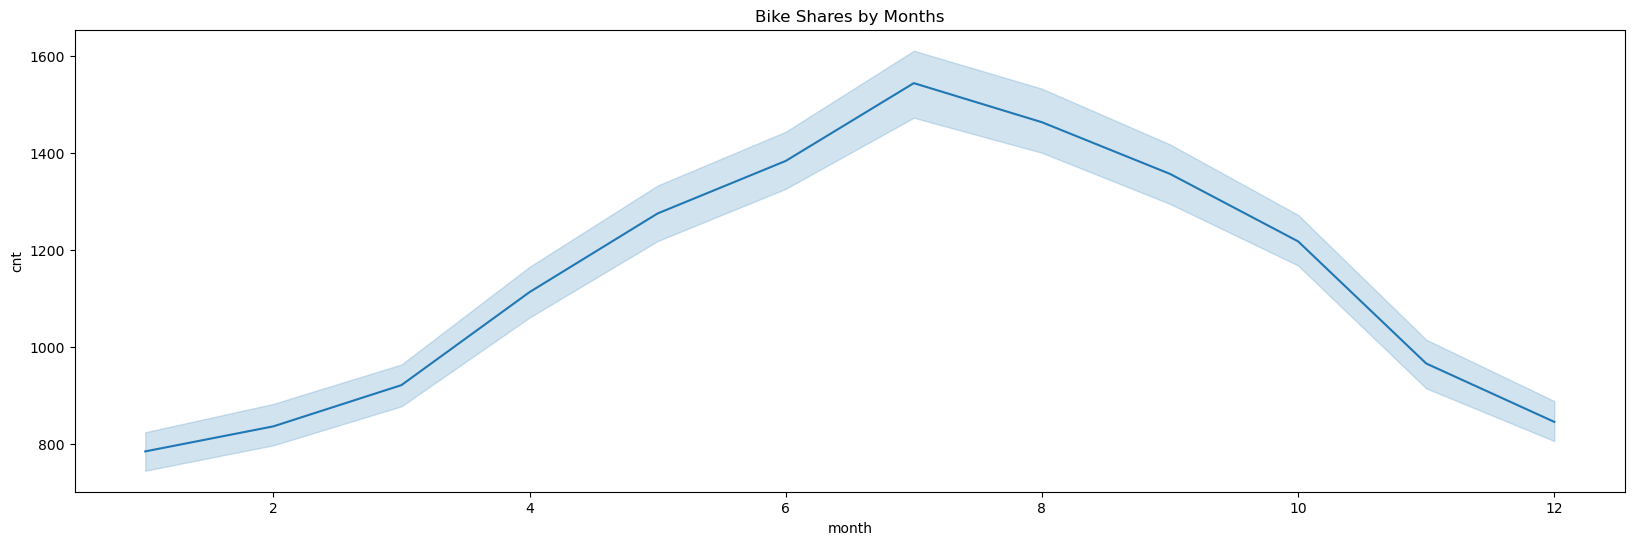

In [76]:
plt.figure(figsize = (20,6))
sns.lineplot(data = df, x = "month", y = "cnt")
plt.title("Bike Shares by Months")
plt.show()

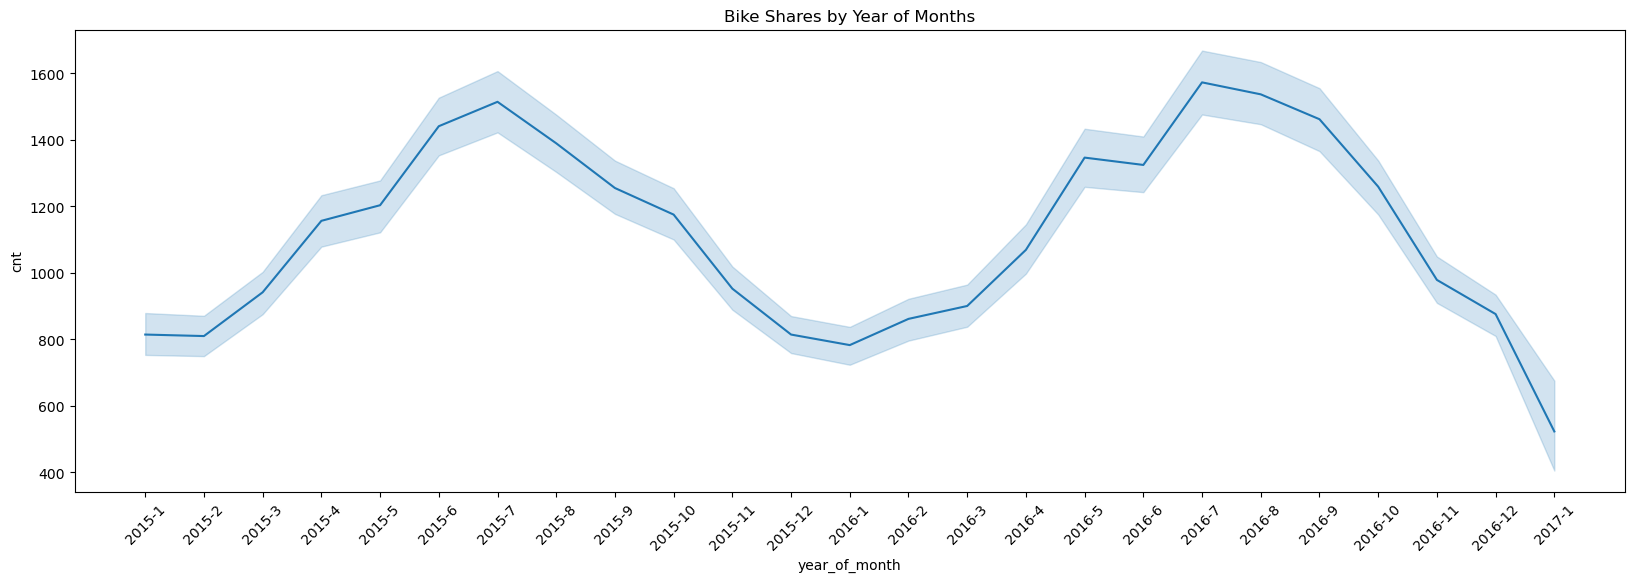

In [77]:
plt.figure(figsize = (20,6))
sns.lineplot(data = df, x = "year_of_month", y = "cnt")
plt.title("Bike Shares by Year of Months")
plt.xticks(rotation = 45)
plt.show()

### pointplot

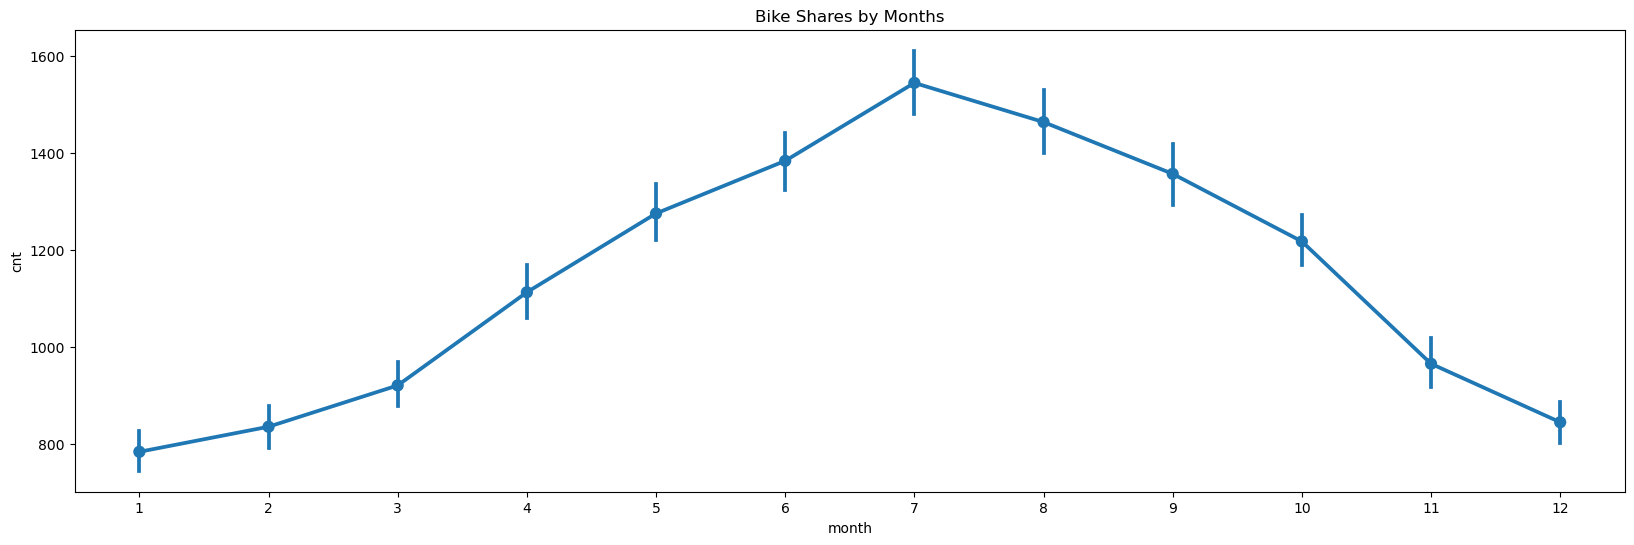

In [79]:
plt.figure(figsize = (20,6))
sns.pointplot(data = df, x = "month", y = "cnt")
plt.title("Bike Shares by Months")
plt.show()

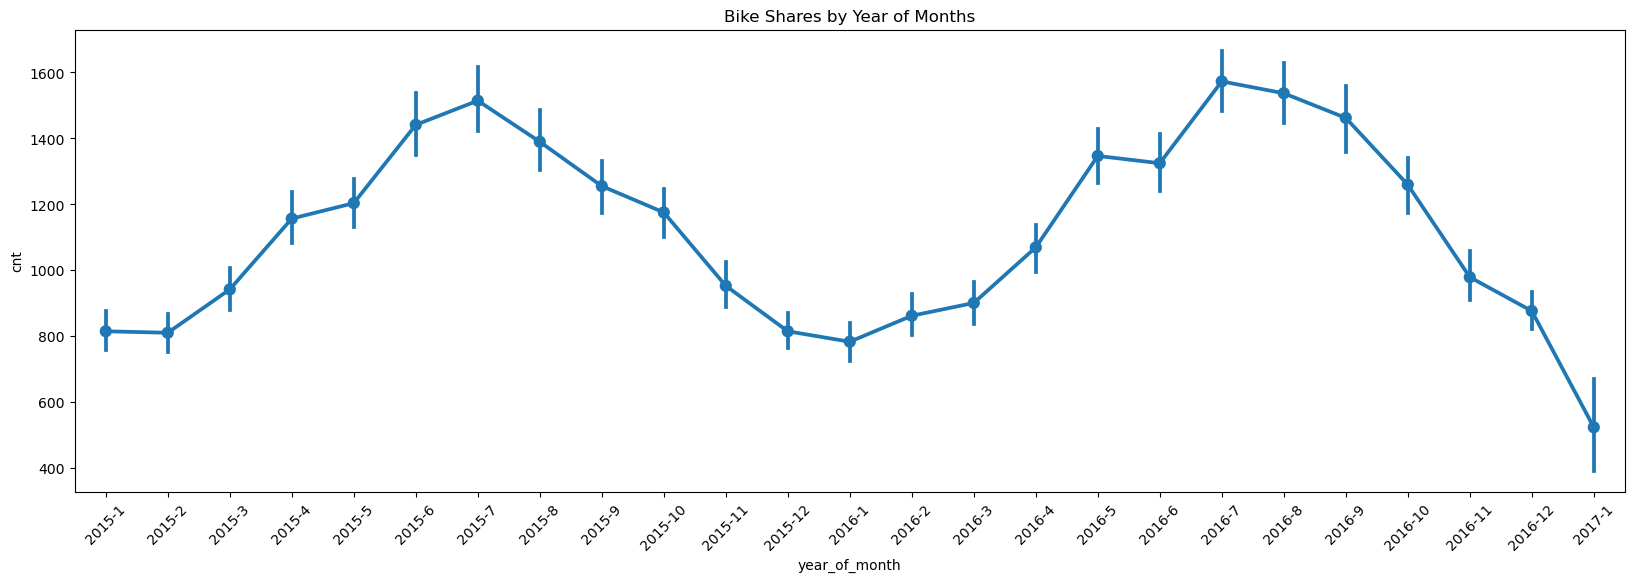

In [78]:
plt.figure(figsize = (20,6))
sns.pointplot(data = df, x = "year_of_month", y = "cnt")
plt.title("Bike Shares by Year of Months")
plt.xticks(rotation = 45)
plt.show()

### barplot

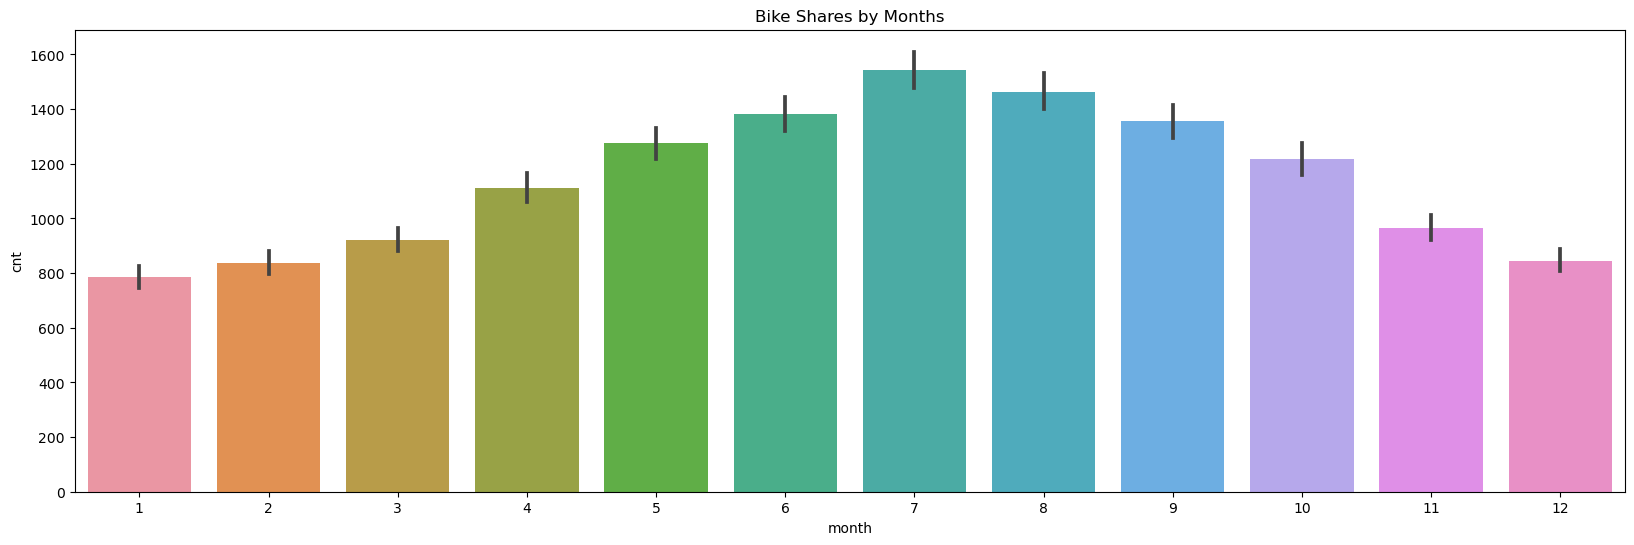

In [82]:
plt.figure(figsize = (20,6))
sns.barplot(data = df, x = "month", y = "cnt")
plt.title("Bike Shares by Months")
plt.show()

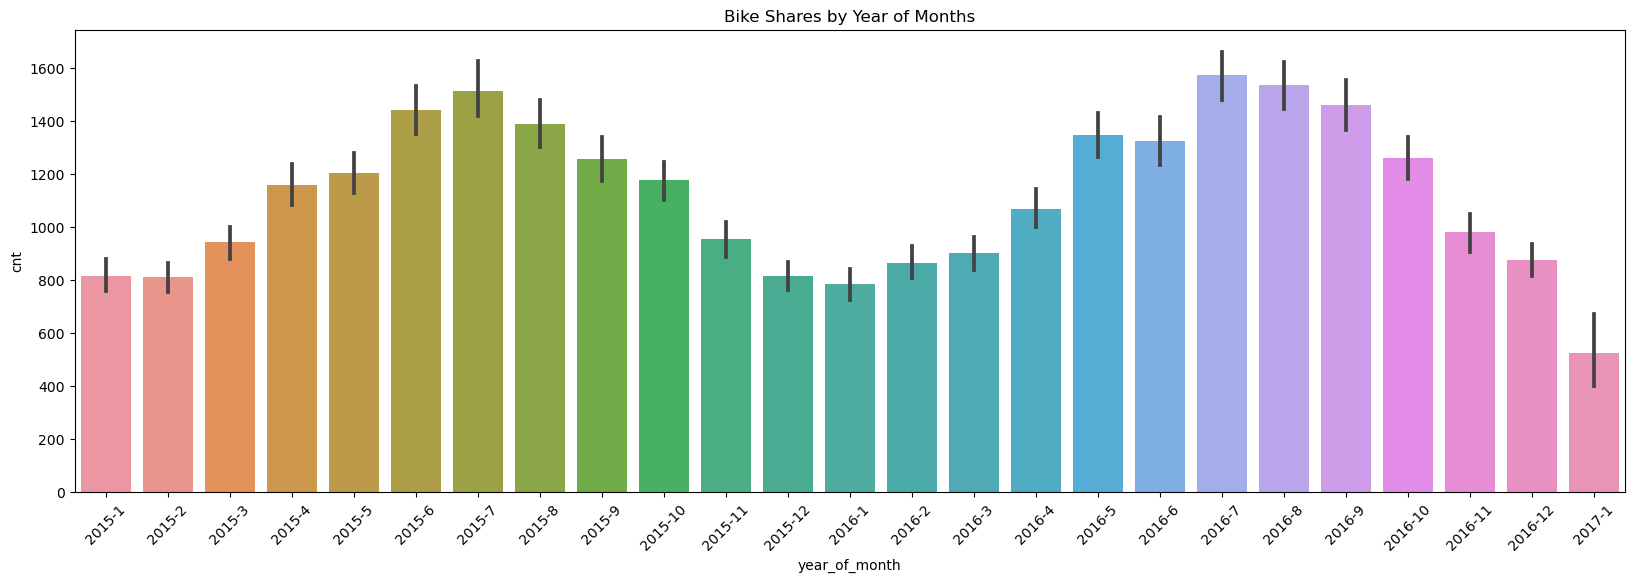

In [81]:
plt.figure(figsize = (20,6))
sns.barplot(data = df, x = "year_of_month", y = "cnt")
plt.title("Bike Shares by Year of Months")
plt.xticks(rotation = 45)
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">11. Plot bike shares by hours on (holidays, weekend, season).
</span>

In [84]:
df.head(2)

cnt   t1   t2   hum  wind_speed  weather_code  \
timestamp                                                            
2015-01-04 00:00:00  182  3.0  2.0  93.0         6.0           3.0   
2015-01-04 01:00:00  138  3.0  2.5  93.0         5.0           1.0   

                     is_holiday  is_weekend  season  hour  day_of_week  \
timestamp                                                                
2015-01-04 00:00:00         0.0         1.0     3.0     0            6   
2015-01-04 01:00:00         0.0         1.0     3.0     1            6   

                     day_of_month  month  quarter  year year_of_month  
timestamp                                                              
2015-01-04 00:00:00             4      1        1  2015        2015-1  
2015-01-04 01:00:00             4      1        1  2015        2015-1

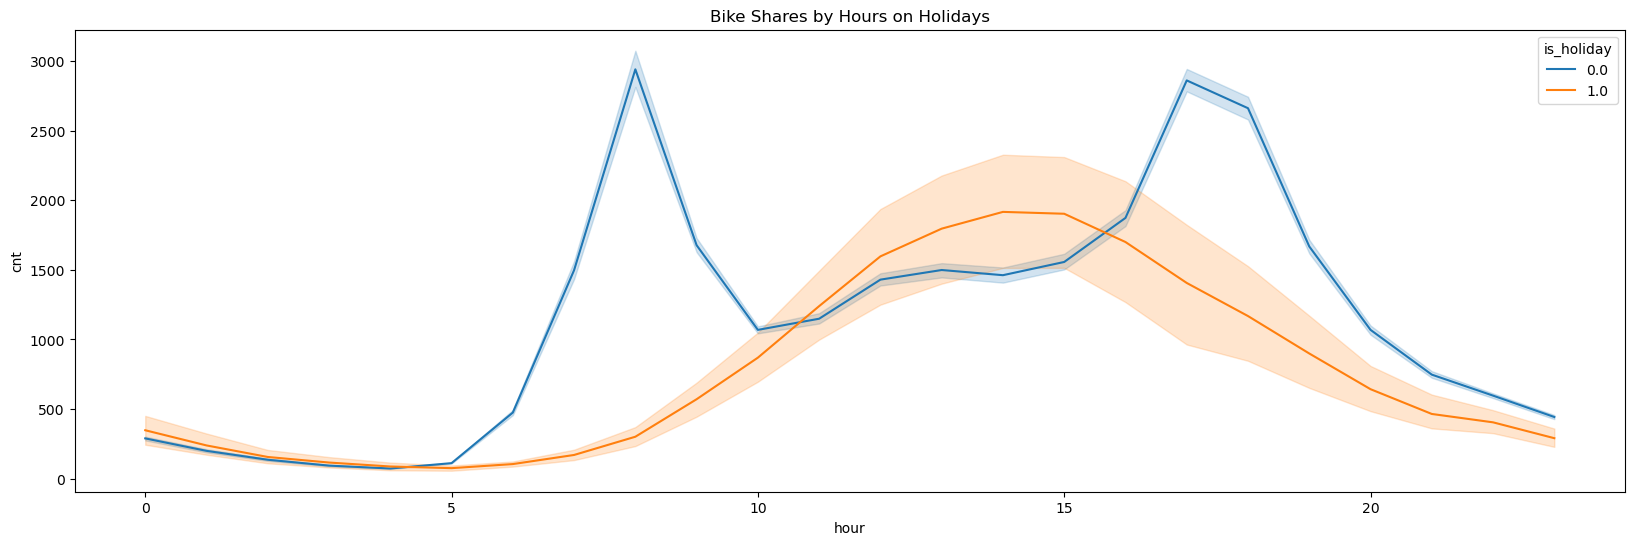

In [85]:
plt.figure(figsize = (20,6))
sns.lineplot(data = df, x = "hour", y = "cnt", hue = "is_holiday")
plt.title("Bike Shares by Hours on Holidays")
plt.show()

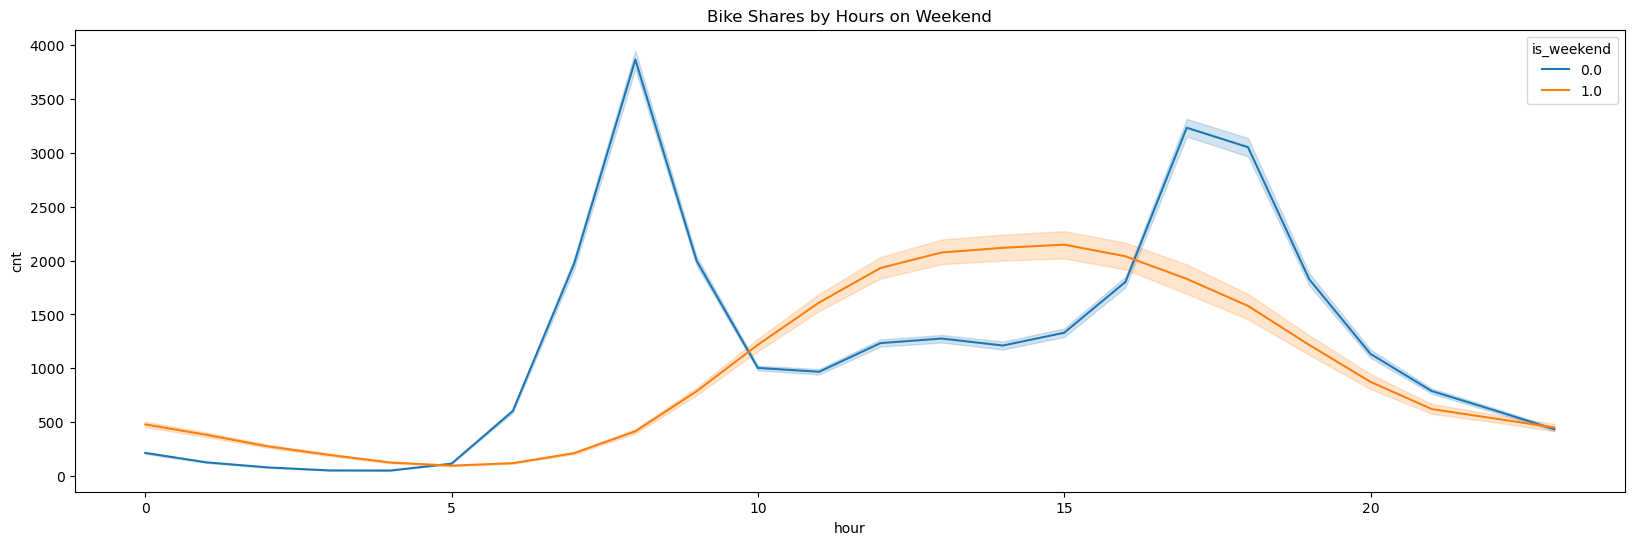

In [86]:
plt.figure(figsize = (20,6))
sns.lineplot(data = df, x = "hour", y = "cnt", hue = "is_weekend")
plt.title("Bike Shares by Hours on Weekend")
plt.show()

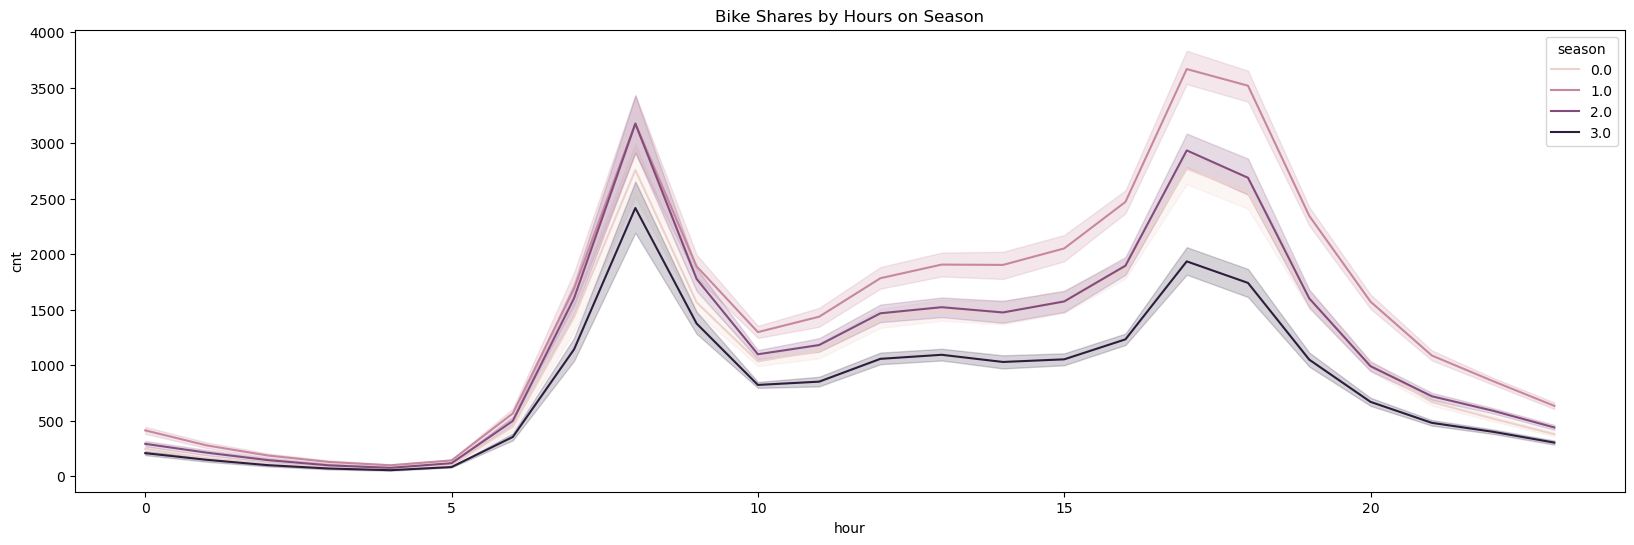

In [87]:
plt.figure(figsize = (20,6))
sns.lineplot(data = df, x = "hour", y = "cnt", hue = "season")
plt.title("Bike Shares by Hours on Season")
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red"> 12. Plot bike shares by day of week.

- You may want to see whether it is a holiday or not
</span>

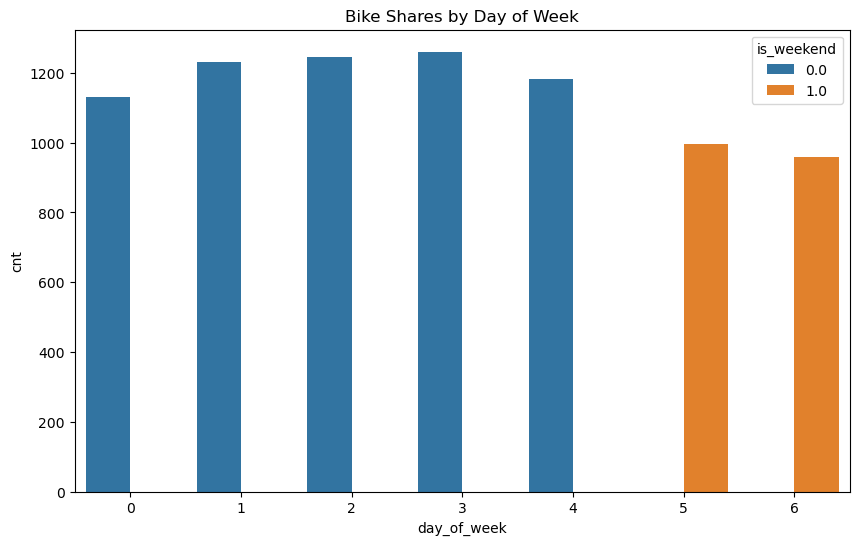

In [93]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data = df, x = "day_of_week", y = "cnt", hue = "is_weekend", ci = False)
plt.title("Bike Shares by Day of Week")
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red"> 13. Plot bike shares by day of month
</span>

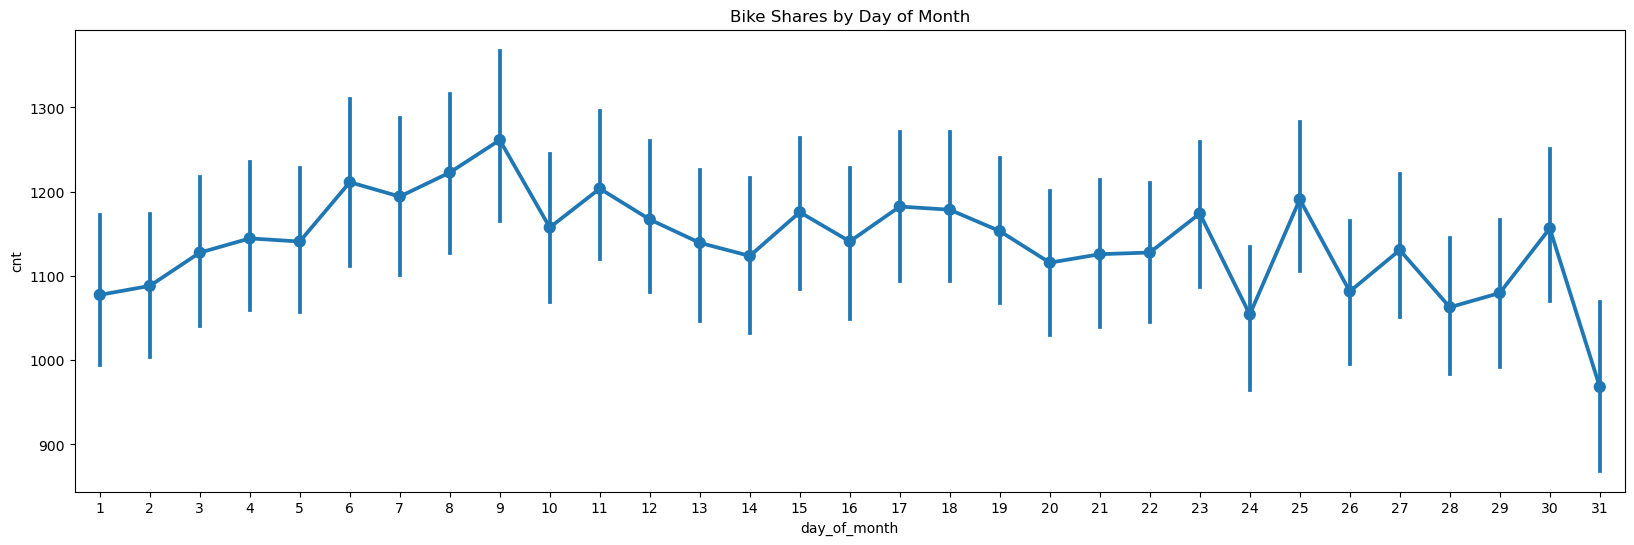

In [96]:
plt.figure(figsize=(20,6))
sns.pointplot(data = df, x = "day_of_month", y = "cnt", )
plt.title("Bike Shares by Day of Month")
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red"> 14. Plot bike shares by year

- Plot bike shares on holidays by seasons
</span>

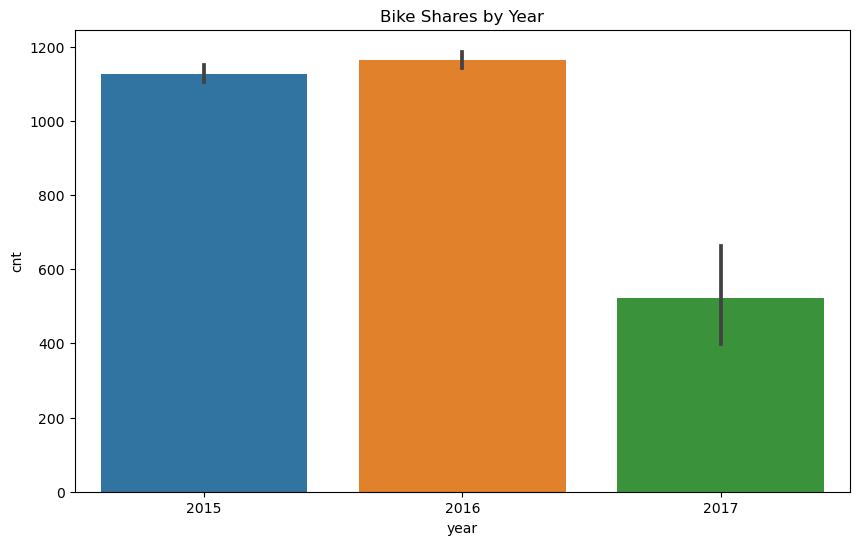

In [97]:
plt.figure(figsize=(10,6))
sns.barplot(data = df, x = "year", y = "cnt")
plt.title("Bike Shares by Year")
plt.show()

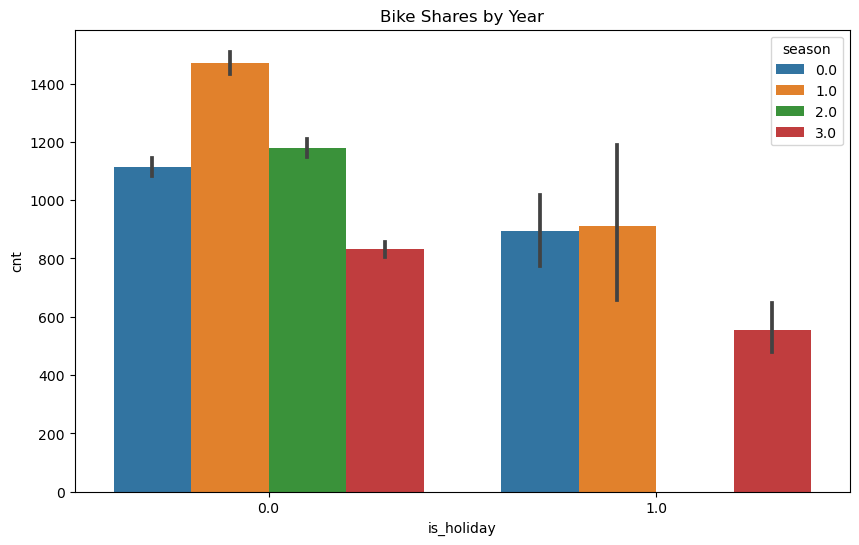

In [102]:
plt.figure(figsize=(10,6))
sns.barplot(data = df, x = "is_holiday", y = "cnt", hue = "season")
plt.title("Bike Shares on Holidays by Seasons")
plt.show()

# 1 holiday / 0 non holiday
# 0-spring ; 1-summer; 2-fall; 3-winter

<div class="alert alert-warning alert-info">
<span style=" color:red">15. Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

In [110]:
df.head(3)

cnt   t1   t2   hum  wind_speed  weather_code  \
timestamp                                                            
2015-01-04 00:00:00  182  3.0  2.0  93.0         6.0           3.0   
2015-01-04 01:00:00  138  3.0  2.5  93.0         5.0           1.0   
2015-01-04 02:00:00  134  2.5  2.5  96.5         0.0           1.0   

                     is_holiday  is_weekend  season  hour  day_of_week  \
timestamp                                                                
2015-01-04 00:00:00         0.0         1.0     3.0     0            6   
2015-01-04 01:00:00         0.0         1.0     3.0     1            6   
2015-01-04 02:00:00         0.0         1.0     3.0     2            6   

                     day_of_month  month  quarter  year year_of_month  
timestamp                                                              
2015-01-04 00:00:00             4      1        1  2015        2015-1  
2015-01-04 01:00:00             4      1        1  2015        2015-1  
2015-01-04 02:00:00             4      1        1  2015        2015-1

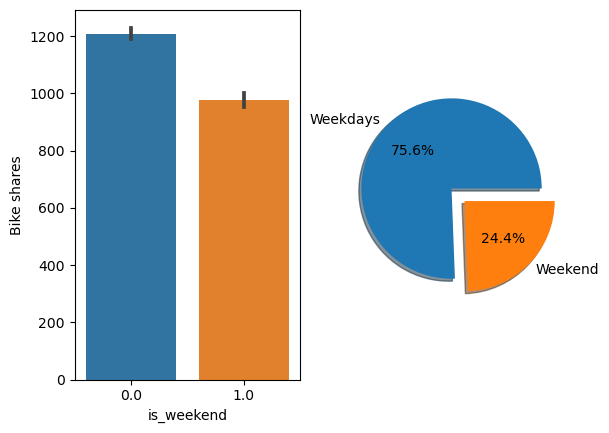

In [21]:
plt.subplot(121)
sns.barplot(data=df, x='is_weekend', y='cnt')
plt.ylabel("Bike shares")
plt.subplot(122)
plt.pie(df.groupby('is_weekend')['cnt'].sum(), explode = [0.1,0.1], labels=["Weekdays","Weekend"], autopct='%1.1f%%', shadow = True)
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">16. Plot the distribution of weather code by seasons
</span>

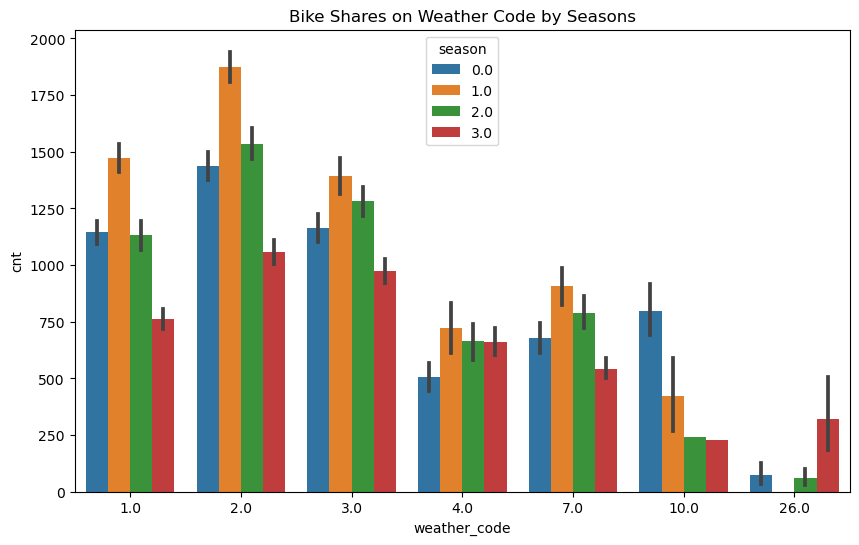

In [114]:
plt.figure(figsize=(10,6))
sns.barplot(data = df, x = "weather_code", y = "cnt", hue = "season")
plt.title("Bike Shares on Weather Code by Seasons")
plt.show()

<div class="alert alert-info alert-info ">

# <span style=" color:red">Conclusions
    

    

</span>

<div class="alert alert-block alert-info">
<span style=" color:red">Thanks for Attending!..
    

</span>

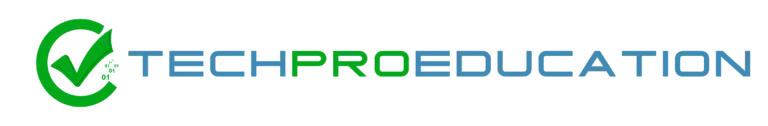